# Sentiment Analysis

**Overview**

1.   Reading the data
2.   Exploratory Data Analysis (EDA)
3.   Data Preprocessing

      *   Text Preprocessing Functions
        *   Removing Punctuations
        *   Tokenization
        *   Removing Stopwords
        *   Lemmatization
      * Applying Preprocessing
      *   Encoding and Vectorization

4.   Model Training
      *   KNN
      *   Decision Tree

5.   Performance comparison of the models
      *   KNN
      *   Decision Tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Reading the data

## Laptop dataset

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
file_path = '/content/drive/DDM_Projekt/Laptop_Train_v2.xml'

tree = ET.parse(file_path)
root = tree.getroot()

# Initialize variables to store data
reviews = []
aspect_terms = []
polarities = []

# Extract the data
for sentence in root.findall(".//sentence"):
    review = sentence.find('text').text
    aspect_terms_in_sentence = sentence.find('.//aspectTerms')

    if aspect_terms_in_sentence is not None:
        for aspect_term in aspect_terms_in_sentence.findall('.//aspectTerm'):
            term = aspect_term.attrib.get('term')
            polarity = aspect_term.attrib.get('polarity')

            reviews.append(review)
            aspect_terms.append(term)
            polarities.append(polarity)

# Creating a DataFrame with the extracted data
df_laptop = pd.DataFrame({
    'Review': reviews,
    'Aspect_Term': aspect_terms,
    'Polarity': polarities
})

df_laptop.head()

,Review,Aspect_Term,Polarity
0,I charge it at night and skip taking the cord ...,cord,neutral
1,I charge it at night and skip taking the cord ...,battery life,positive
2,The tech guy then said the service center does...,service center,negative
3,The tech guy then said the service center does...,"""sales"" team",negative
4,The tech guy then said the service center does...,tech guy,neutral


## Restaurant dataset

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
file_path = '/content/drive/MyDrive/Restaurants_Train_v2.xml'

tree = ET.parse(file_path)
root = tree.getroot()

# Initialize variables to store data
reviews = []
aspect_terms = []
polarities = []

# Extract the data
for sentence in root.findall(".//sentence"):
    review = sentence.find('text').text
    aspect_terms_in_sentence = sentence.find('.//aspectTerms')

    if aspect_terms_in_sentence is not None:
        for aspect_term in aspect_terms_in_sentence.findall('.//aspectTerm'):
            term = aspect_term.attrib.get('term')
            polarity = aspect_term.attrib.get('polarity')

            reviews.append(review)
            aspect_terms.append(term)
            polarities.append(polarity)

# Creating a DataFrame with the extracted data
df_restaurant = pd.DataFrame({
    'Review': reviews,
    'Aspect_Term': aspect_terms,
    'Polarity': polarities
})

df_restaurant.head()

,Review,Aspect_Term,Polarity
0,But the staff was so horrible to us.,staff,negative
1,"To be completely fair, the only redeeming fact...",food,positive
2,"The food is uniformly exceptional, with a very...",food,positive
3,"The food is uniformly exceptional, with a very...",kitchen,positive
4,"The food is uniformly exceptional, with a very...",menu,neutral


# Exploratory Data Analyis

## Laptop data

In [ ]:
df_laptop.count()

Review         2358
Aspect_Term    2358
Polarity       2358
dtype: int64

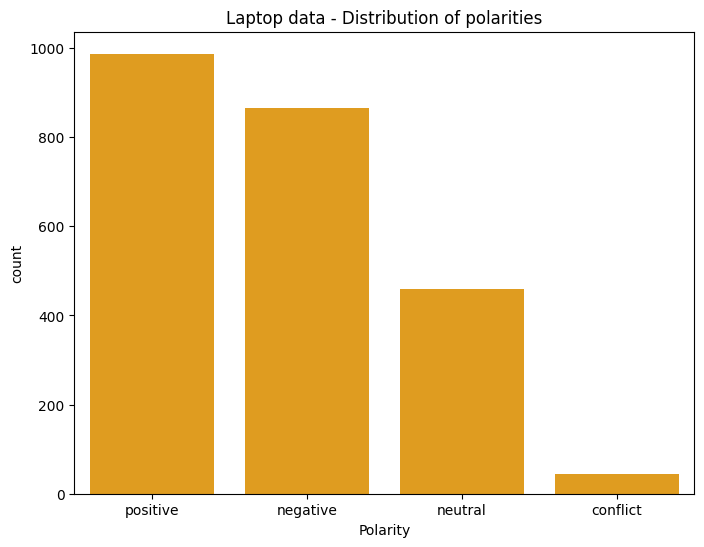

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of polarities
plt.figure(figsize=(8, 6))
sns.countplot(x='Polarity', data=df_laptop, order=df_laptop['Polarity'].value_counts().index, color='orange')
plt.title('Laptop data - Distribution of polarities')
plt.show()

<ipython-input-174-f5dc42a1dfa9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Aspect_Term', data=top_aspect_terms, palette='viridis')


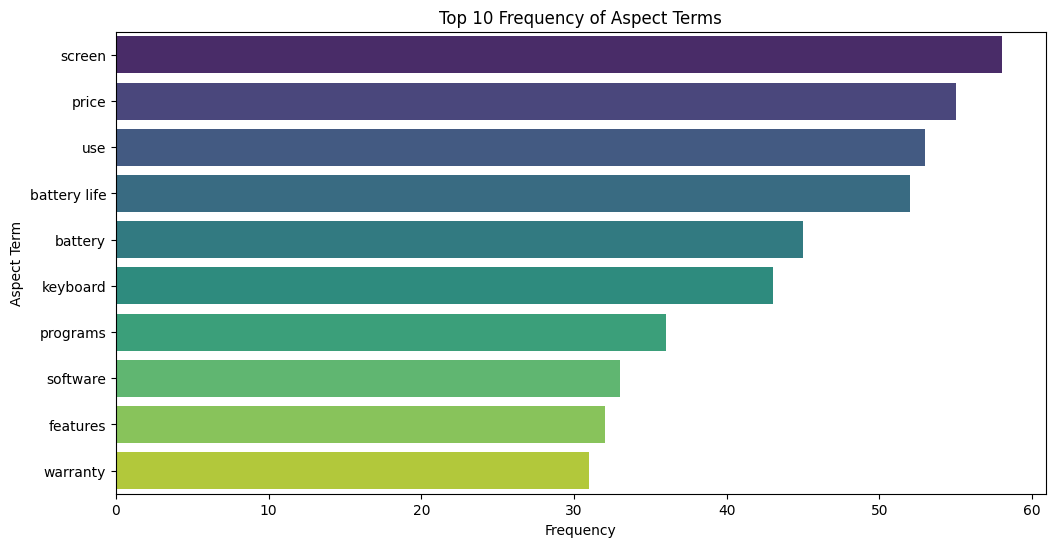

In [ ]:
# Restriction to the 10 most frequent aspect terms
top_aspect_terms = df_laptop['Aspect_Term'].value_counts().nlargest(10).reset_index()
top_aspect_terms.columns = ['Aspect_Term', 'Frequency']

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Aspect_Term', data=top_aspect_terms, palette='viridis')
plt.title('Top 10 Frequency of Aspect Terms')
plt.xlabel('Frequency')
plt.ylabel('Aspect Term')
plt.show()

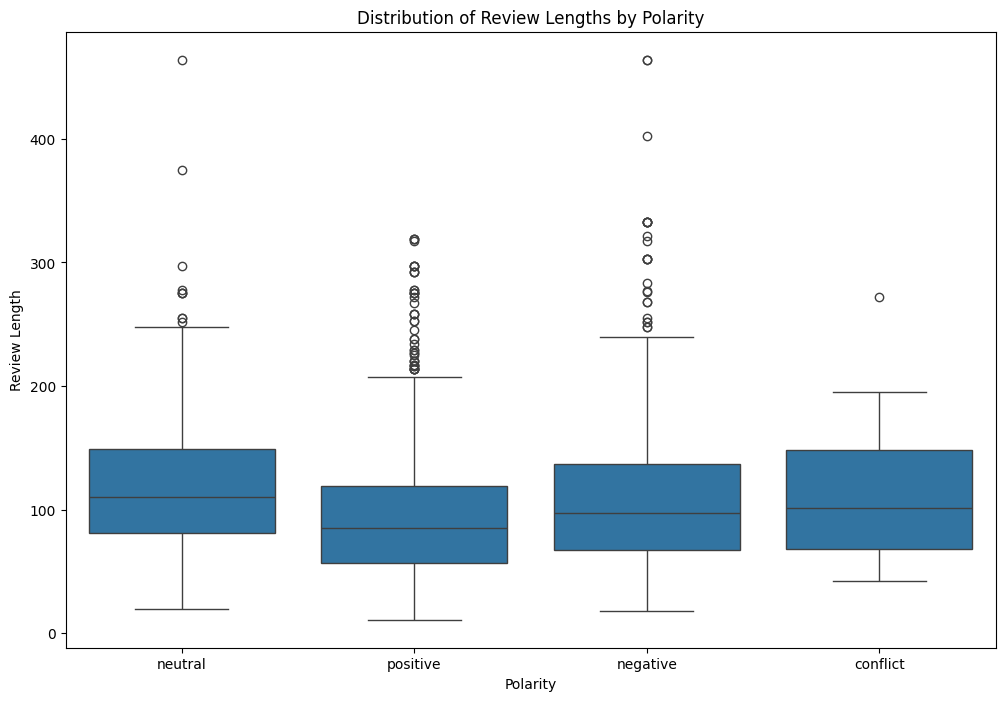

In [ ]:
# Add a new column for review length
df_laptop['Review_Length'] = df_laptop['Review'].apply(len)

# Plotting the distribution of Review Lengths by Polarity
plt.figure(figsize=(12, 8))
sns.boxplot(x='Polarity', y='Review_Length', data=df_laptop)
plt.title('Distribution of Review Lengths by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Review Length')
plt.show()


## Restaurant data

In [ ]:
df_restaurant.count()

Review         3693
Aspect_Term    3693
Polarity       3693
dtype: int64

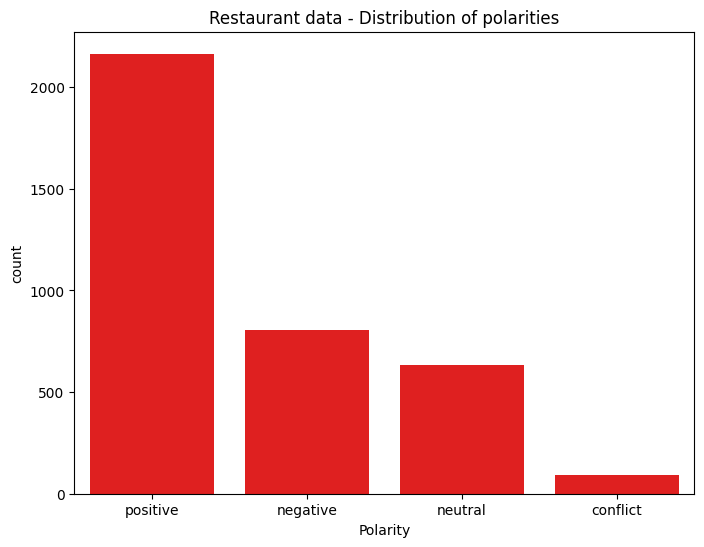

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of polarities
plt.figure(figsize=(8, 6))
sns.countplot(x='Polarity', data=df_restaurant, order=df_restaurant['Polarity'].value_counts().index, color='r')
plt.title('Restaurant data - Distribution of polarities')
plt.show()

# Data Preprocessing

## Text Preprocessing Functions

In [ ]:
# Import necessary libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to tokenize
def tokenize(text):
    return word_tokenize(text)

# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Function to lemmatize
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Function to apply all text preprocessing steps
def preprocess_text(text):
    text_no_punctuation = remove_punctuation(text)
    tokens = tokenize(text_no_punctuation)
    tokens_no_stopwords = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize(tokens_no_stopwords)
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Applying Preprocessing for review text

### Laptop data

In [ ]:
# Apply preprocessing to the reviews
df_laptop['Processed_Review'] = df_laptop['Review'].apply(preprocess_text)
df_laptop.head()

,Review,Aspect_Term,Polarity,Review_Length,Processed_Review
0,I charge it at night and skip taking the cord ...,cord,neutral,87,I charge night skip taking cord good battery life
1,I charge it at night and skip taking the cord ...,battery life,positive,87,I charge night skip taking cord good battery life
2,The tech guy then said the service center does...,service center,negative,179,The tech guy said service center 1to1 exchange...
3,The tech guy then said the service center does...,"""sales"" team",negative,179,The tech guy said service center 1to1 exchange...
4,The tech guy then said the service center does...,tech guy,neutral,179,The tech guy said service center 1to1 exchange...


### Restaurant data

In [ ]:
# Apply preprocessing to the reviews
df_restaurant['Processed_Review'] = df_restaurant['Review'].apply(preprocess_text)
df_restaurant.head()

,Review,Aspect_Term,Polarity,Processed_Review
0,But the staff was so horrible to us.,staff,negative,But staff horrible u
1,"To be completely fair, the only redeeming fact...",food,positive,To completely fair redeeming factor food avera...
2,"The food is uniformly exceptional, with a very...",food,positive,The food uniformly exceptional capable kitchen...
3,"The food is uniformly exceptional, with a very...",kitchen,positive,The food uniformly exceptional capable kitchen...
4,"The food is uniformly exceptional, with a very...",menu,neutral,The food uniformly exceptional capable kitchen...


# Cleaning data for sentiment analysis

## Aggregation of polarities

### Aggregation function

In [ ]:
def aggregate_polarity(review_aspects):
    # Count how many aspects of each polarity are present
    positive_count = review_aspects[review_aspects == 'positive'].count()
    negative_count = review_aspects[review_aspects == 'negative'].count()

    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

### Aggregation and cleaning on restaurant data

In [ ]:
# Aggregation of polarity at the review level
aggregated_polarities = df_restaurant.groupby('Review')['Polarity'].apply(aggregate_polarity)

# Create a new DataFrame containing only the unique reviews and aggregated polarity
df_restaurant_sentiment_analysis = df_restaurant[['Review', 'Processed_Review']].drop_duplicates()
df_restaurant_sentiment_analysis['Aggregated_Polarity'] = df_restaurant_sentiment_analysis['Review'].map(aggregated_polarities)

# Anzeigen der ersten paar Zeilen des aktualisierten DataFrames
df_restaurant_sentiment_analysis.head()

,Review,Processed_Review,Aggregated_Polarity
0,But the staff was so horrible to us.,But staff horrible u,negative
1,"To be completely fair, the only redeeming fact...",To completely fair redeeming factor food avera...,positive
2,"The food is uniformly exceptional, with a very...",The food uniformly exceptional capable kitchen...,positive
5,"Not only was the food outstanding, but the lit...",Not food outstanding little perk great,positive
7,Our agreed favorite is the orrechiete with sau...,Our agreed favorite orrechiete sausage chicken...,positive


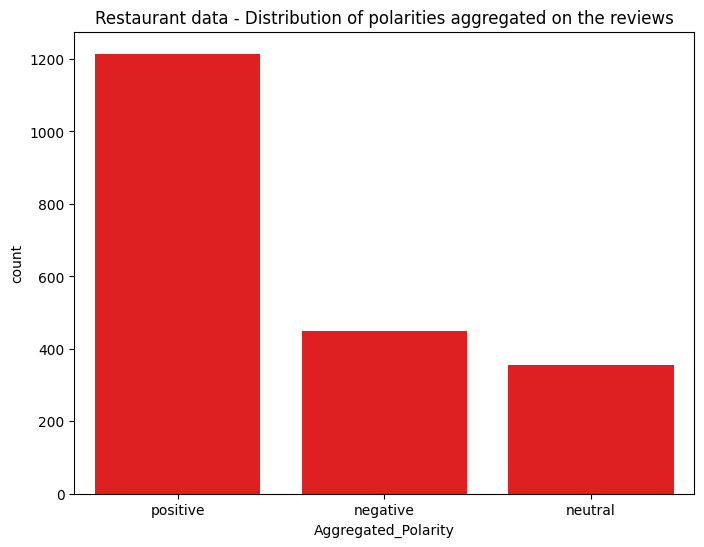

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of polarities
plt.figure(figsize=(8, 6))
sns.countplot(x='Aggregated_Polarity', data=df_restaurant_sentiment_analysis, order=df_restaurant_sentiment_analysis['Aggregated_Polarity'].value_counts().index, color='r')
plt.title('Restaurant data - Distribution of polarities aggregated on the reviews')
plt.show()

### Aggregation and cleaning on laptop data

In [ ]:
# Aggregation der Polarität auf Review-Ebene
aggregated_polarities = df_laptop.groupby('Review')['Polarity'].apply(aggregate_polarity)

# Erstellen eines neuen DataFrames, der nur die einzigartigen Reviews und die aggregierte Polarität enthält
df_laptop_sentiment_analysis = df_laptop[['Review','Processed_Review']].drop_duplicates()
df_laptop_sentiment_analysis['Aggregated_Polarity'] = df_laptop_sentiment_analysis['Review'].map(aggregated_polarities)

# Anzeigen der ersten paar Zeilen des aktualisierten DataFrames
df_laptop_sentiment_analysis.head()

,Review,Processed_Review,Aggregated_Polarity
0,I charge it at night and skip taking the cord ...,I charge night skip taking cord good battery life,positive
2,The tech guy then said the service center does...,The tech guy said service center 1to1 exchange...,negative
5,"it is of high quality, has a killer GUI, is ex...",high quality killer GUI extremely stable highl...,positive
9,Easy to start up and does not overheat as much...,Easy start overheat much laptop,positive
10,"I even got my teenage son one, because of the ...",I even got teenage son one feature offer like ...,positive


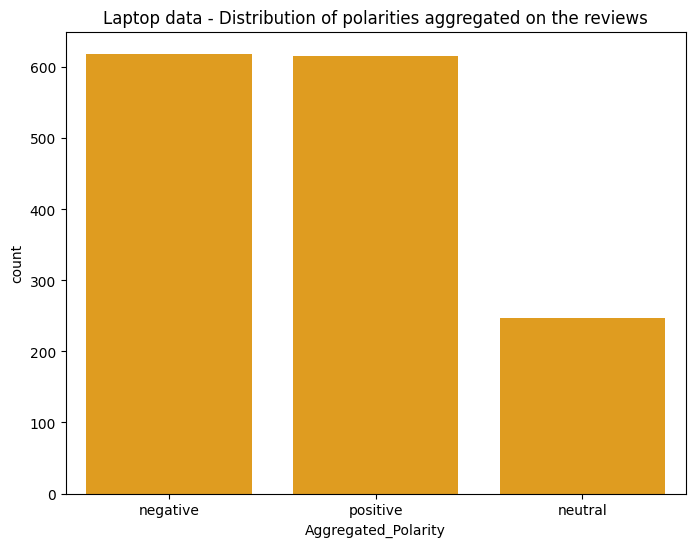

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of polarities
plt.figure(figsize=(8, 6))
sns.countplot(x='Aggregated_Polarity', data=df_laptop_sentiment_analysis, order=df_laptop_sentiment_analysis['Aggregated_Polarity'].value_counts().index, color='orange')
plt.title('Laptop data - Distribution of polarities aggregated on the reviews')
plt.show()

# Training of the models

## Model Training with KNN for sentiment analysis for KNN
Training Data: Restaurant, Test Data: Laptop

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the processed reviews
vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(df_restaurant_sentiment_analysis['Processed_Review'])
vectorizer.fit(df_restaurant_sentiment_analysis['Processed_Review'])
X = vectorizer.transform(df_restaurant_sentiment_analysis['Processed_Review'])

# Training of the model
knn = KNeighborsClassifier(n_neighbors=8)
y_train = df_restaurant_sentiment_analysis['Aggregated_Polarity']
knn.fit(X, y_train)

# Vectorization of the test data
X_test_processed = vectorizer.transform(df_laptop_sentiment_analysis['Processed_Review'])

# Apply the model on the test data
y_pred_knn = knn.predict(X_test_processed)

## Model Training with DecisionTree for sentiment analysis
Training Data: Restaurant, Test Data: Laptop

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
y_trainset = df_restaurant_sentiment_analysis['Aggregated_Polarity']
dt_model.fit(X, y_trainset)

# Applying vectorization
X_test_processedset = vectorizer.transform(df_laptop_sentiment_analysis['Processed_Review'])

# Storing the result of test input dataset
y_pred_dt = dt_model.predict(X_test_processedset)

In [ ]:
#model persistence
import joblib

joblib.dump(dt_model,"sentiment_analysis.joblib")
print(dt_model.predict(vectorizer.transform(['moderate service'])))
print(dt_model.predict(vectorizer.transform(['bad battery life'])))
print(dt_model.predict(vectorizer.transform(['delicious salad'])))

## Model Training with KNN for sentiment analysis
Training Data: Laptop, Test Data: Laptop

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the processed reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_laptop_sentiment_analysis['Processed_Review'])

y = df_laptop_sentiment_analysis['Aggregated_Polarity']

X_train_laptop, X_test_laptop, y_train_laptop, y_test_laptop = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Training of the model
laptop_knn = KNeighborsClassifier()
laptop_knn.fit(X_train_laptop, y_train_laptop)

# Apply the model on the test data
y_pred_laptop_knn = laptop_knn.predict(X)

## Model Training with DecisionTree for sentiment analysis
Training Data: Laptop, Test Data: Laptop

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the processed reviews
vectorizer_dt = TfidfVectorizer()
vectorizer_dt.fit(df_laptop_sentiment_analysis['Processed_Review'])
X =vectorizer_dt.transform(df_laptop_sentiment_analysis['Processed_Review'])

y = df_laptop_sentiment_analysis['Aggregated_Polarity']

X_train_laptop, X_test_laptop, y_train_laptop, y_test_laptop = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training of the model
laptop_dt = DecisionTreeClassifier()
laptop_dt.fit(X_train_laptop, y_train_laptop)

# Apply the model on the test data
y_pred_laptop_dt = laptop_dt.predict(X)

# Evaluation of models

## Evaluation of the KNN-model for sentiment analysis
Training Data: Restaurant, Test Data: Laptop

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report

# Correct labels for the aspect terms
true_labels = df_laptop_sentiment_analysis['Aggregated_Polarity']

# Classification report for the classfication of aspect terms
print(classification_report(true_labels, y_pred_knn))

              precision    recall  f1-score   support

    negative       0.59      0.34      0.43       619
     neutral       0.21      0.11      0.15       247
    positive       0.52      0.83      0.64       616

    accuracy                           0.51      1482
   macro avg       0.44      0.43      0.40      1482
weighted avg       0.50      0.51      0.47      1482



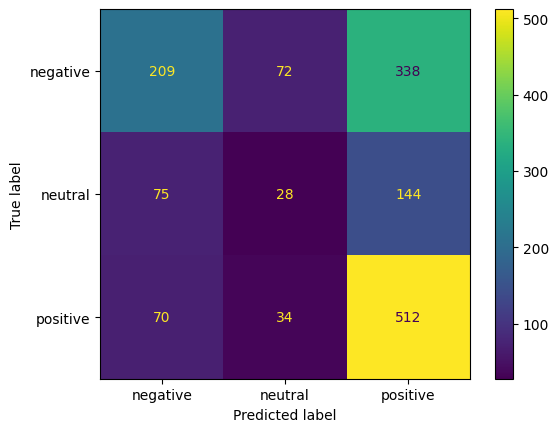

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(true_labels, y_pred_knn)
plt.show()

## Evaluation of the DecisionTree model for sentiment analysis
Training Data: Restaurant, Test Data: Laptop

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report

# Correct labels for the aspect terms
true_labels = df_laptop_sentiment_analysis['Aggregated_Polarity']

# Classification report for the classfication of aspect terms
print(classification_report(true_labels, y_pred_dt))

              precision    recall  f1-score   support

    negative       0.49      0.26      0.34       619
     neutral       0.25      0.20      0.22       247
    positive       0.48      0.74      0.58       616

    accuracy                           0.45      1482
   macro avg       0.40      0.40      0.38      1482
weighted avg       0.44      0.45      0.42      1482



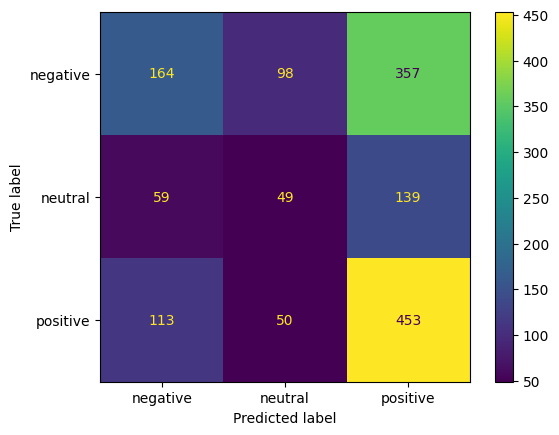

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(true_labels, y_pred_dt)
plt.show()

## Evaluation of the KNN-model for sentiment analysis
Training Data: Laptop, Test Data: Laptop

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report

# Correct labels for the aspect terms
true_labels = df_laptop_sentiment_analysis['Aggregated_Polarity']

# Classification report for the classfication of aspect terms
print(classification_report(true_labels, y_pred_laptop_knn))

              precision    recall  f1-score   support

    negative       0.70      0.81      0.75       619
     neutral       0.58      0.31      0.40       247
    positive       0.79      0.81      0.80       616

    accuracy                           0.73      1482
   macro avg       0.69      0.64      0.65      1482
weighted avg       0.72      0.73      0.71      1482



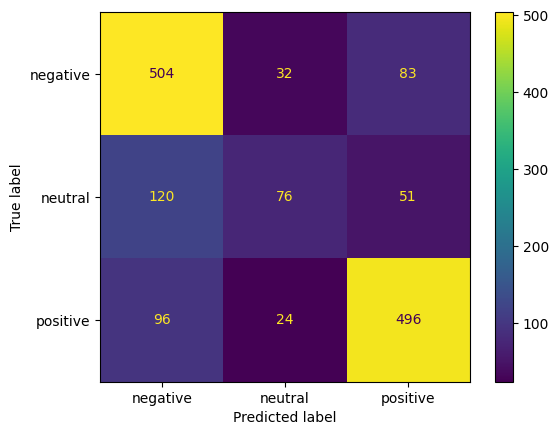

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(true_labels, y_pred_laptop_knn)
plt.show()

## Evaluation of the DecisionTree model for sentiment analysis
Training Data: Laptop, Test Data: Laptop

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report

# Correct labels for the aspect terms
true_labels = df_laptop_sentiment_analysis['Aggregated_Polarity']

# Classification report for the classfication of aspect terms
print(classification_report(true_labels, y_pred_laptop_dt))

              precision    recall  f1-score   support

    negative       0.90      0.95      0.93       619
     neutral       0.90      0.82      0.86       247
    positive       0.93      0.92      0.93       616

    accuracy                           0.92      1482
   macro avg       0.91      0.90      0.90      1482
weighted avg       0.92      0.92      0.92      1482



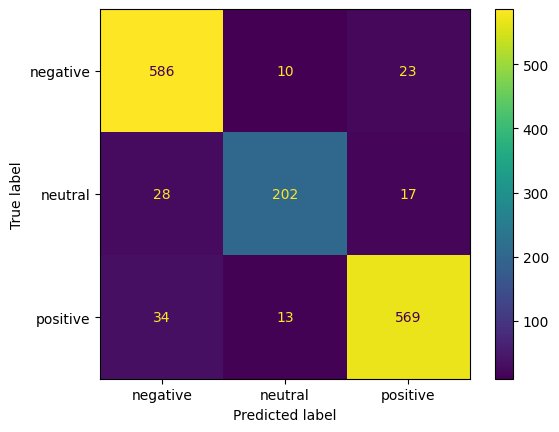

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(true_labels, y_pred_laptop_dt)
plt.show()

 # Comparison of model performance

## Confusion Matrix comparison

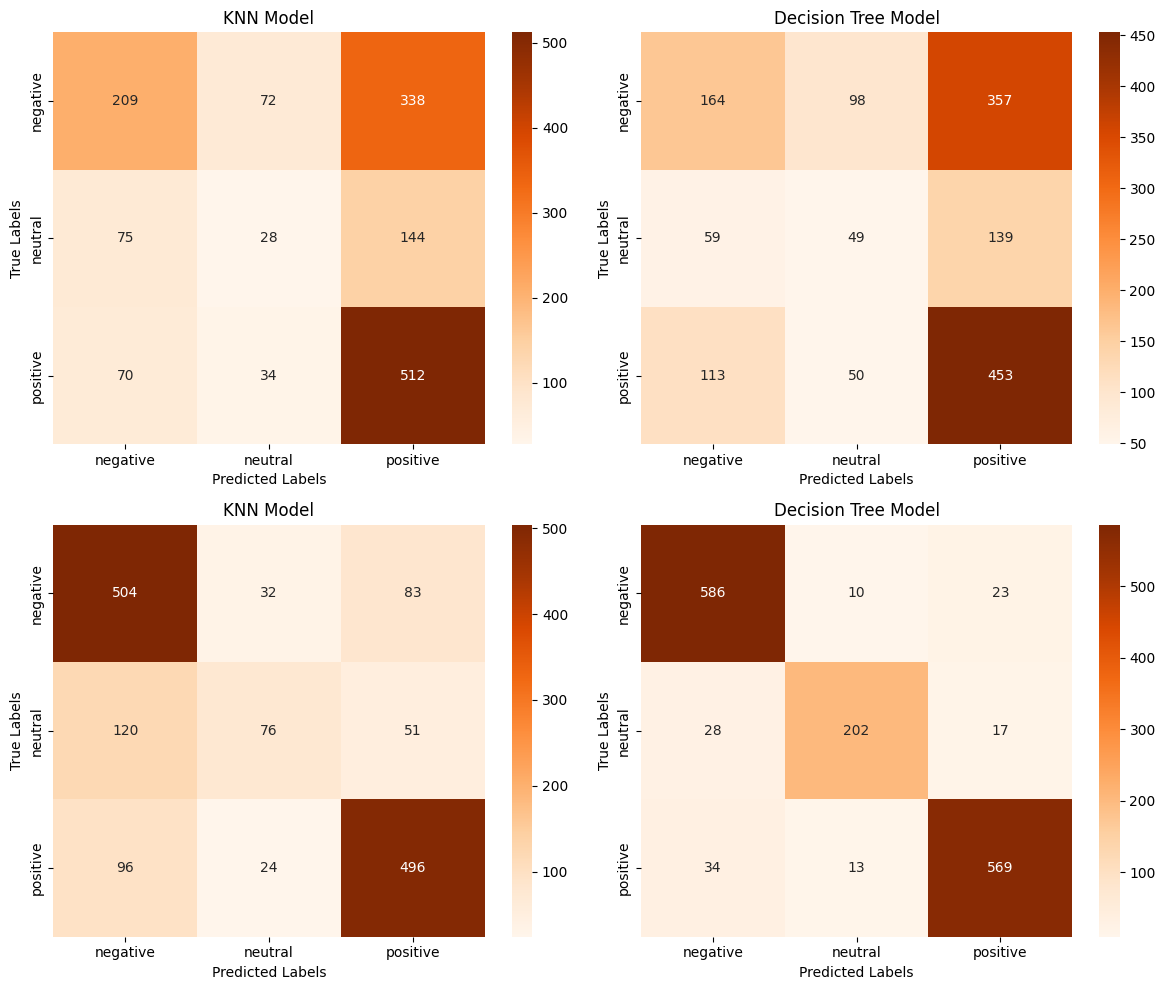

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = df_laptop_sentiment_analysis['Aggregated_Polarity']

labels = ['negative', 'neutral', 'positive']

# Calculation of the confusion matrices
cm_domain_adaptation_knn = confusion_matrix(true_labels, y_pred_knn, labels=labels)
cm_domain_adaptation_dt = confusion_matrix(true_labels, y_pred_dt, labels=labels)
cm_only_laptop_data_knn = confusion_matrix(true_labels, y_pred_laptop_knn, labels=labels)
cm_only_laptop_data_dt = confusion_matrix(true_labels, y_pred_laptop_dt, labels=labels)

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix for Domain Adaptation - KNN model
sns.heatmap(cm_domain_adaptation_knn, annot=True, ax=ax[0, 0], cmap='Oranges', fmt='g', xticklabels=labels, yticklabels=labels)
ax[0, 0].set_title('KNN Model')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

# Confusion Matrix for Domain Adaptation - Decision Tree Model
sns.heatmap(cm_domain_adaptation_dt, annot=True, ax=ax[0, 1], cmap='Oranges', fmt='g', xticklabels=labels, yticklabels=labels)
ax[0, 1].set_title('Decision Tree Model')
ax[0, 1].set_xlabel('Predicted Labels')
ax[0, 1].set_ylabel('True Labels')

# Confusion Matrix for Only Laptop Data - KNN model
sns.heatmap(cm_only_laptop_data_knn, annot=True, ax=ax[1, 0], cmap='Oranges', fmt='g', xticklabels=labels, yticklabels=labels)
ax[1, 0].set_title('KNN Model')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

# Confusion Matrix for Only Laptop Data - Decision Tree model
sns.heatmap(cm_only_laptop_data_dt, annot=True, ax=ax[1, 1], cmap='Oranges', fmt='g', xticklabels=labels, yticklabels=labels)
ax[1, 1].set_title('Decision Tree Model')
ax[1, 1].set_xlabel('Predicted Labels')
ax[1, 1].set_ylabel('True Labels')


plt.tight_layout()
plt.show()

## Classification report comparison

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Save the classification reports in dictionaries
report_knn = classification_report(true_labels, y_pred_knn, output_dict=True, zero_division=0)
report_dt = classification_report(true_labels, y_pred_dt, output_dict=True, zero_division=0)
report_laptop_knn = classification_report(true_labels, y_pred_laptop_knn, output_dict=True, zero_division=0)
report_laptop_dt = classification_report(true_labels, y_pred_laptop_dt, output_dict=True, zero_division=0)

# Function for extracting a metric from the report
def extract_metric(report, metric):
    return pd.Series({label: values[metric] for label, values in report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']})

### Training on restaurant data and testing on laptop data

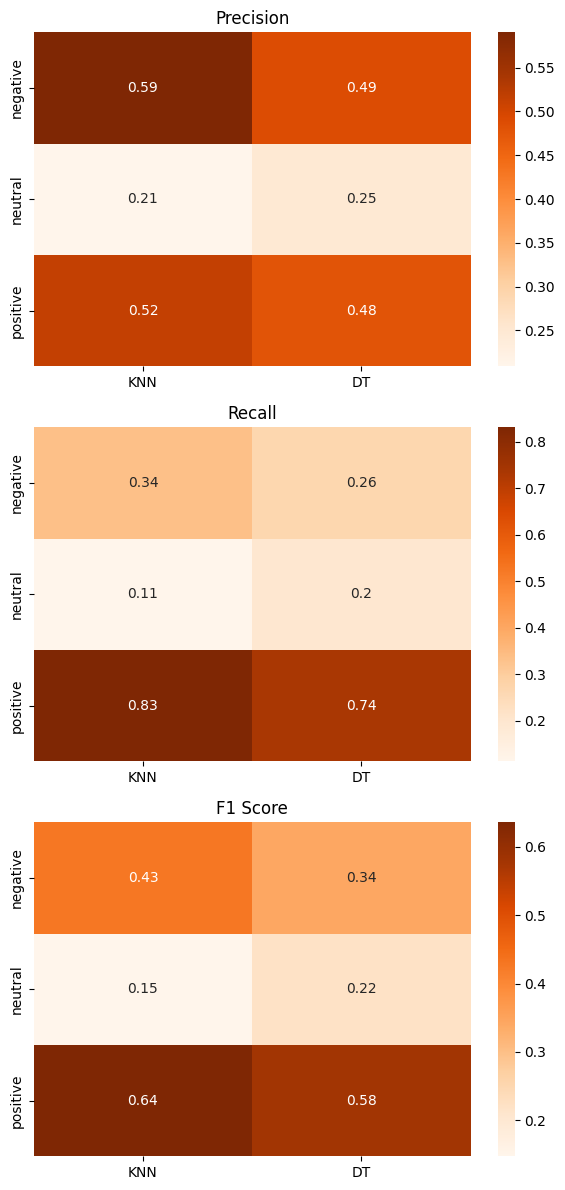

In [ ]:
# DataFrames for KNN and DT (trained on restaurant data, tested on laptop data)
precision_df_restaurant = pd.DataFrame({'KNN': extract_metric(report_knn, 'precision'),
                                        'DT': extract_metric(report_dt, 'precision')})

recall_df_restaurant = pd.DataFrame({'KNN': extract_metric(report_knn, 'recall'),
                                     'DT': extract_metric(report_dt, 'recall')})

f1_df_restaurant = pd.DataFrame({'KNN': extract_metric(report_knn, 'f1-score'),
                                 'DT': extract_metric(report_dt, 'f1-score')})

# Create the heatmaps
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

sns.heatmap(precision_df_restaurant, annot=True, ax=axes[0], cmap='Oranges')
axes[0].set_title('Precision')

sns.heatmap(recall_df_restaurant, annot=True, ax=axes[1], cmap='Oranges')
axes[1].set_title('Recall')

sns.heatmap(f1_df_restaurant, annot=True, ax=axes[2], cmap='Oranges')
axes[2].set_title('F1 Score')

plt.tight_layout()
plt.show()

### Training and testing on laptop data

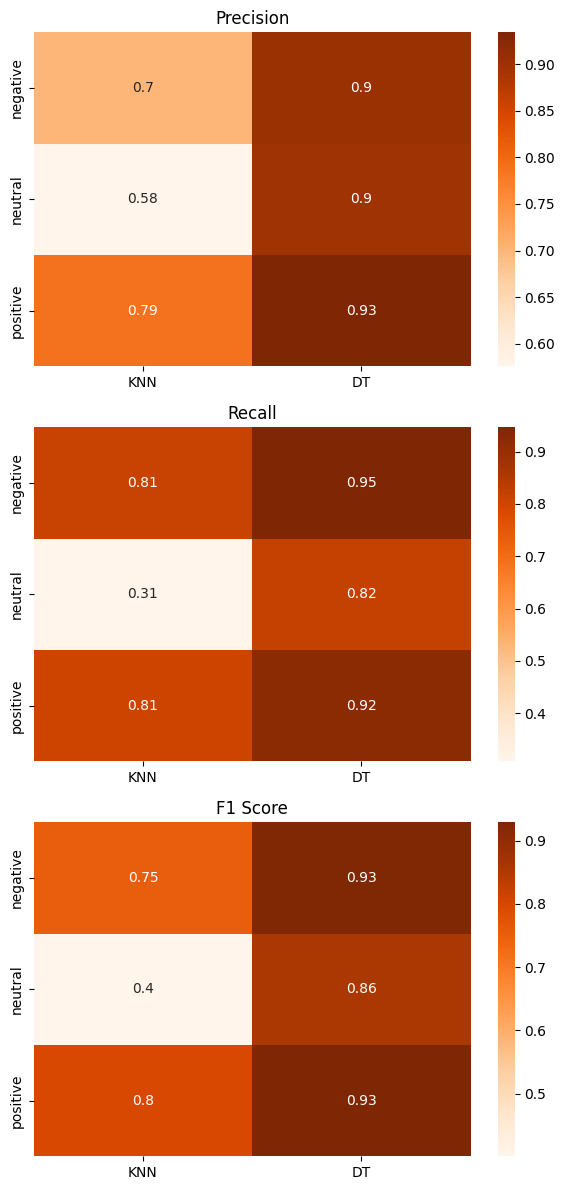

In [ ]:
# DataFrames for KNN and DT (only with laptop data)
precision_df_laptop = pd.DataFrame({'KNN': extract_metric(report_laptop_knn, 'precision'),
                                    'DT': extract_metric(report_laptop_dt, 'precision')})

recall_df_laptop = pd.DataFrame({'KNN': extract_metric(report_laptop_knn, 'recall'),
                                 'DT': extract_metric(report_laptop_dt, 'recall')})

f1_df_laptop = pd.DataFrame({'KNN': extract_metric(report_laptop_knn, 'f1-score'),
                             'DT': extract_metric(report_laptop_dt, 'f1-score')})

# Create the heatmaps
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

sns.heatmap(precision_df_laptop, annot=True, ax=axes[0], cmap='Oranges')
axes[0].set_title('Precision')

sns.heatmap(recall_df_laptop, annot=True, ax=axes[1], cmap='Oranges')
axes[1].set_title('Recall')

sns.heatmap(f1_df_laptop, annot=True, ax=axes[2], cmap='Oranges')
axes[2].set_title('F1 Score')

plt.tight_layout()
plt.show()

#Interpretation of the results

0      Boot time super fast around anywhere 35 second...
1      tech support would fix problem unless I bought...
2                                   resume computer rock
3                                               Set easy
4           Did enjoy new Windows 8 touchscreen function
                             ...                        
795    This hardware seems better iMac isnt 1400 smaller
796                             Im done WinDoze computer
797              Ive 2 month found issue software update
798                            latest version disc drive
799    Screen although people might complain low re I...
Name: Processed_Review, Length: 800, dtype: object
{'positive': 366, 'negative': 305, 'neutral': 129}
{'positive': 366, 'negative': 305, 'neutral': 129}


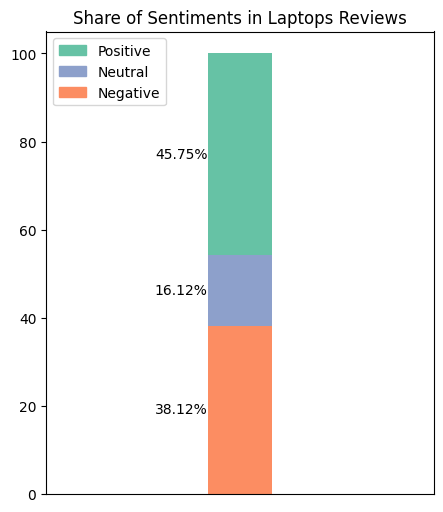

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib.patches import Patch

# Parse the XML file
file_path = '/content/drive/MyDrive/DDM_Projekt/Laptops_Test_Data_PhaseA.xml'

tree = ET.parse(file_path)
root = tree.getroot()

# Initialize variables to store data
reviews = []
aspect_terms = []
polarities = []

# Extract the data
for sentence in root.findall(".//sentence"):
    review = sentence.find('text').text
    reviews.append(review)

# Creating a DataFrame with the extracted data
df_laptop = pd.DataFrame({
    'Review': reviews,
})

# Apply preprocessing to the reviews
df_laptop['Processed_Review'] = df_laptop['Review'].apply(preprocess_text)
df_laptop_sentiment_analysis = df_laptop[['Review','Processed_Review']].drop_duplicates()
df_laptop_sentiment_analysis['Aggregated_Polarity'] = df_laptop_sentiment_analysis['Review'].map(aggregated_polarities)
print(df_laptop['Processed_Review'] )
X = vectorizer_dt.transform(df_laptop_sentiment_analysis['Processed_Review'])
#X = vectorizer.transform(df_laptop['Processed_Review'])
y_pred_dt = laptop_dt.predict(X)
counts = dict()
for i in y_pred_dt:
  counts[i] = counts.get(i, 0) + 1
print(counts)
series = pd.Series(counts)
#series.sort_values(ascending=False).plot(kind='bar', figsize=(20, 6), color='purple')
#plt.title('Frequency distribution of the aspect terms')
#plt.xlabel('Aspect Terms')
#plt.ylabel('Frequency')

print(counts)

#new
df = pd.DataFrame([counts.values()], columns=counts.keys())
df = df[['negative', 'neutral', 'positive']]

# Calculate the total
total = df.sum(axis=1).values[0]

# Calculate the percentage of each sentiment
df_percentage = df / total * 100

colors = ['#fc8d62', '#8da0cb', '#66c2a5']
# Create a stacked bar plot
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(5, 6), color=colors, width=0.1)

# Add labels and title
plt.title('Share of Sentiments in Laptops Reviews')
ax.get_xaxis().set_visible(False)
#plt.xlabel('Sentiment')
#plt.ylabel('Percentage')
legend_labels = ['Positive', 'Neutral', 'Negative']
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors[::-1], legend_labels)]
ax.legend(handles=legend_handles, loc='upper left')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x, y + height / 2), ha='right', va='center')


# Show the plot
plt.show()